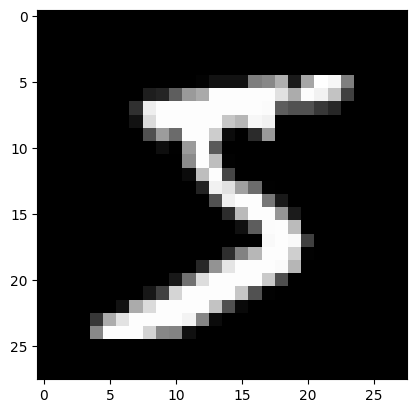

In [2]:
import warnings
import os
import sys

%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')
current_dir = %pwd

parent_dir = os.path.abspath(os.path.join(current_dir, '../'))
sys.path.append(parent_dir)


import torch
from src.augmentations import random_permutation
import config

from torchvision import datasets

# load the mnist dataset
mnist = datasets.MNIST(config.DATASET_PATH, download=False)

# get the first image
image, label = mnist[0]

# display the image
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.show()



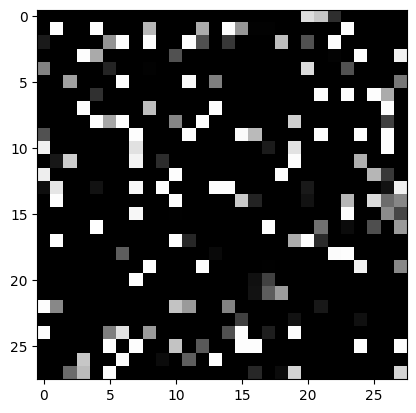

In [3]:
import numpy as np
numpy_image = np.array(image)
perm_image = random_permutation(numpy_image)
plt.imshow(perm_image, cmap='gray')
plt.show()

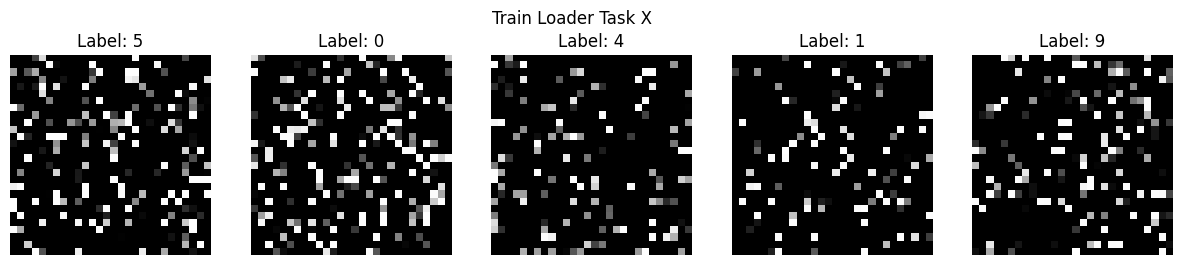

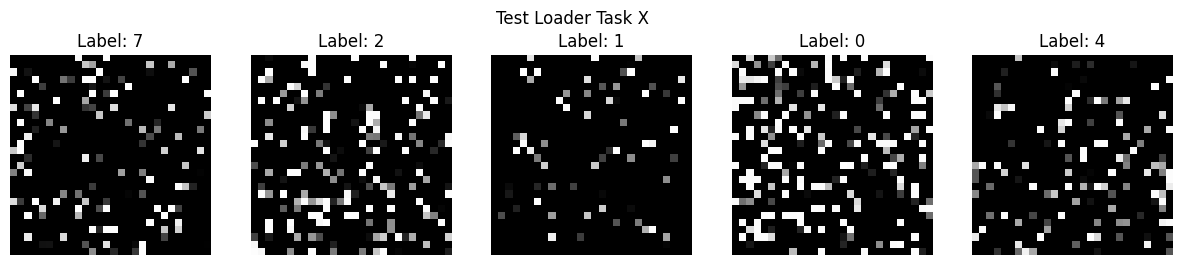

In [ ]:
import matplotlib.pyplot as plt
from src.datasets.perm_mnist import PermutedMNIST

# Function to visualize a batch
def visualize_batch(loader, title):
    batch = next(iter(loader))
    imgs, targets = batch[0], batch[1]

    fig, axs = plt.subplots(1, 5, figsize=(15, 3))
    for i in range(5):
        axs[i].imshow(imgs[i].squeeze(), cmap="gray")
        axs[i].set_title(f"Label: {targets[i].item()}")
        axs[i].axis("off")
    plt.suptitle(title)
    plt.show()


dataset = PermutedMNIST()
task_id = 0
train_loader = dataset.tasks[task_id][0]
test_loader = dataset.test_loaders[task_id]
# Call this inside training for different tasks
visualize_batch(train_loader, title="Train Loader Task {}".format(task_id))
visualize_batch(test_loader, title="Test Loader Task {}".format(task_id))
